In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

df = pd.read_csv("googleplaystore.csv")
#data = df.iloc[:,[1,2,3,4,5,6,7,9]]
##data.iloc[10472,1:] = data.iloc[10472,1:].shift(1)
#data["Installs"] = pd.to_numeric(data["Installs"].str.replace(",","").str.replace("+",""))
#data = data[data["Category"].str.contains("1.9") == False]
#mydata = data[["Size","Category", "Rating", "Reviews", "Installs"]]
#mydata["Reviews"] = pd.to_numeric(mydata["Reviews"])
#cat_list = list(mydata["Category"].drop_duplicates())

#cat_data = mydata[["Size","Rating","Reviews","Installs"]]
#cat_data

In [16]:
data = df[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']].groupby(['App']).max().dropna().reset_index()
data["Installs"] = pd.to_numeric(data["Installs"].str.replace(",","").str.replace("+",""))
data_all=data[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']]
mydata = data[["Size", "Rating", "Reviews", "Installs"]]
mydata["Reviews"] = pd.to_numeric(mydata["Reviews"])
data_all["Reviews"] = pd.to_numeric(data_all["Reviews"])
mydata

<ipython-input-16-43423b590ebc>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data["Installs"] = pd.to_numeric(data["Installs"].str.replace(",","").str.replace("+",""))
<ipython-input-16-43423b590ebc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata["Reviews"] = pd.to_numeric(mydata["Reviews"])


,Size,Rating,Reviews,Installs
0,22M,4.5,40467,1000000
1,9.1M,3.5,115,10000
2,203k,4.5,259,10000
3,53M,4.7,573,10000
4,14M,4.4,27,100
...,...,...,...,...
8191,34M,4.4,190,10000
8192,26M,3.8,718,10000
8193,18M,4.6,22098,1000000
8194,3.2M,4.0,19,10000


In [3]:
cat_data=mydata[['Rating', 'Reviews', 'Size', 'Installs']]
cat_data.dtypes

Rating      float64
Reviews       int64
Size         object
Installs      int64
dtype: object

In [4]:
#dodaj diagram wystepowan
cat_data["Size"].count()
cat_data["Size"].sort_values()

926                   1.0M
3909                  1.0M
8033                  1.0M
6218                  1.0M
2338                  1.1M
               ...        
6438    Varies with device
6428    Varies with device
6423    Varies with device
1635    Varies with device
4012    Varies with device
Name: Size, Length: 8196, dtype: object

In [316]:
my_data4=cat_data["Size"].unique()
my_data4.sort()
my_data4

array(['1.0M', '1.1M', '1.2M', '1.3M', '1.4M', '1.5M', '1.6M', '1.7M',
       '1.8M', '1.9M', '10.0M', '100M', '103k', '10M', '116k', '118k',
       '11M', '11k', '121k', '122k', '12M', '13M', '141k', '143k', '144k',
       '14M', '14k', '153k', '154k', '15M', '160k', '161k', '164k',
       '169k', '16M', '170k', '173k', '175k', '176k', '17M', '17k',
       '186k', '18M', '18k', '190k', '192k', '193k', '196k', '19M',
       '2.0M', '2.1M', '2.2M', '2.3M', '2.4M', '2.5M', '2.6M', '2.7M',
       '2.8M', '2.9M', '201k', '203k', '206k', '208k', '209k', '20M',
       '20k', '210k', '219k', '21M', '220k', '221k', '226k', '228k',
       '22M', '232k', '234k', '239k', '23M', '23k', '240k', '241k',
       '246k', '24M', '24k', '251k', '253k', '257k', '259k', '25M', '25k',
       '266k', '26M', '26k', '270k', '27M', '27k', '280k', '283k', '288k',
       '28M', '28k', '292k', '293k', '29M', '29k', '3.0M', '3.1M', '3.2M',
       '3.3M', '3.4M', '3.5M', '3.6M', '3.7M', '3.8M', '3.9M', '306k',
     

In [6]:
my_data2=cat_data[cat_data["Size"]=="Varies with device"].count()["Size"]
print(my_data2)

my_data3=cat_data[cat_data["Size"]!="Varies with device"].count()["Size"]
print(my_data3)
cat_data["Size"].count()


1171
7025


8196

In [7]:
# != Zależy od urządzenia
my_data=cat_data[cat_data["Size"]!="Varies with device"]



In [8]:
data = my_data[["Size","Rating"]].groupby("Size").describe().reset_index()
data.columns = data.columns.droplevel()
data = data.sort_values("count", ascending=False)
data.iloc[:10,0:4]

,,count,mean,std
25,14M,149.0,4.172483,0.581687
20,12M,146.0,4.208904,0.532129
16,11M,144.0,4.236111,0.502666
21,13M,143.0,4.131469,0.601456
29,15M,138.0,4.215217,0.496543
39,17M,115.0,4.191304,0.516664
88,25M,113.0,4.222124,0.533140
34,16M,106.0,4.113208,0.604598
68,21M,106.0,4.146226,0.601613
48,19M,105.0,4.144762,0.499996


In [9]:
data = my_data[["Size","Reviews"]].groupby("Size").describe().reset_index()
data.columns = data.columns.droplevel()
data = data.sort_values("count", ascending=False)
data.iloc[:10,0:4]

,,count,mean,std
25,14M,149.0,203968.570470,1.233602e+06
20,12M,146.0,59364.869863,1.944620e+05
16,11M,144.0,92376.791667,4.587358e+05
21,13M,143.0,77670.440559,2.066414e+05
29,15M,138.0,176846.268116,1.206934e+06
39,17M,115.0,227923.843478,1.211490e+06
88,25M,113.0,105809.115044,3.331479e+05
34,16M,106.0,139333.471698,6.643854e+05
68,21M,106.0,93263.386792,2.653496e+05
48,19M,105.0,42226.819048,1.096258e+05


In [10]:
data = my_data[["Size","Installs"]].groupby("Size").describe().reset_index()
data.columns = data.columns.droplevel()
data = data.sort_values("count", ascending=False)
data.iloc[:10,0:4]

,,count,mean,std
25,14M,149.0,4.017626e+06,1.398543e+07
20,12M,146.0,3.871504e+06,1.485148e+07
16,11M,144.0,6.614949e+06,4.326272e+07
21,13M,143.0,1.117654e+07,8.440597e+07
29,15M,138.0,3.366042e+06,1.283143e+07
39,17M,115.0,8.929391e+06,4.863077e+07
88,25M,113.0,4.384349e+06,1.316118e+07
34,16M,106.0,4.531361e+06,1.517230e+07
68,21M,106.0,2.985763e+06,8.595272e+06
48,19M,105.0,1.680470e+06,2.836241e+06


In [11]:
sorted_list = list(data.sort_values("count", ascending=False)[""])
print(sorted_list)

['14M', '12M', '11M', '13M', '15M', '17M', '25M', '16M', '21M', '19M', '26M', '24M', '20M', '18M', '23M', '22M', '10M', '27M', '28M', '30M', '37M', '31M', '33M', '35M', '29M', '3.3M', '44M', '40M', '2.5M', '3.8M', '2.8M', '39M', '2.3M', '2.9M', '32M', '46M', '38M', '36M', '3.0M', '34M', '48M', '4.0M', '3.1M', '3.4M', '3.9M', '5.0M', '3.5M', '3.7M', '3.2M', '4.3M', '2.7M', '4.1M', '2.2M', '4.2M', '2.4M', '5.4M', '41M', '49M', '6.3M', '3.6M', '43M', '45M', '2.6M', '1.5M', '2.0M', '1.8M', '50M', '4.6M', '4.5M', '5.7M', '63M', '6.1M', '4.4M', '7.3M', '5.3M', '6.9M', '53M', '4.9M', '1.6M', '5.1M', '47M', '1.2M', '42M', '57M', '2.1M', '60M', '5.8M', '8.7M', '8.5M', '99M', '4.7M', '9.8M', '7.0M', '1.7M', '8.3M', '5.9M', '1.3M', '9.1M', '9.2M', '6.4M', '6.0M', '5.5M', '1.9M', '52M', '55M', '1.1M', '7.4M', '51M', '56M', '6.5M', '5.6M', '7.9M', '54M', '1.4M', '5.2M', '59M', '8.2M', '6.6M', '6.2M', '61M', '4.8M', '9.0M', '7.2M', '7.1M', '96M', '6.8M', '6.7M', '7.5M', '8.1M', '7.7M', '7.6M', '9.5M

<ipython-input-12-a70fc1b51885>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)
<ipython-input-12-a70fc1b51885>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,2)
<ipython-input-12-a70fc1b51885>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

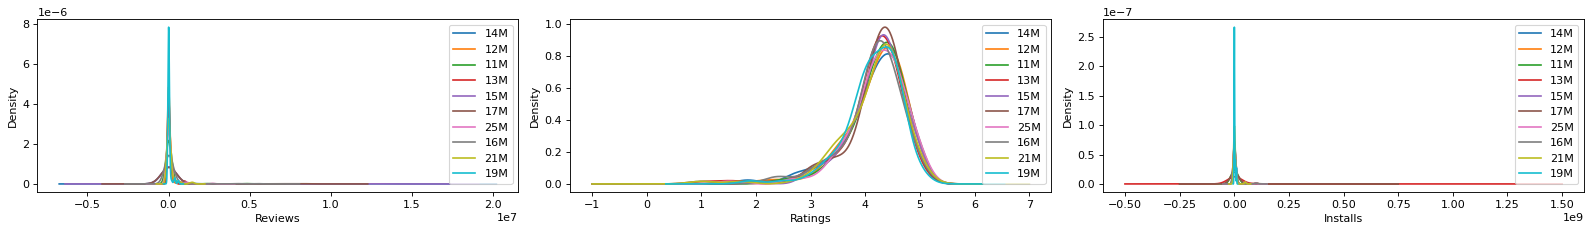

In [12]:
i = 0
top = 10
top_list = sorted_list[:top]
plt.figure(figsize=(20,3), dpi = 80)

while i < top:
    
    plt.subplot(1,3,1)
    reviews = mydata[mydata["Size"] == top_list[i]]["Reviews"]
    reviews.plot.density()
    plt.legend(top_list)
    plt.xlabel("Reviews")

    plt.subplot(1,3,2)
    ratings = mydata[mydata["Size"] == top_list[i]]["Rating"]
    ratings.plot.density()
    plt.legend(top_list)
    plt.xlabel("Ratings")

    plt.subplot(1,3,3)
    installs = mydata[mydata["Size"] == top_list[i]]["Installs"]
    installs.plot.density()
    plt.legend(top_list)
    plt.xlabel("Installs")
    plt.tight_layout()

    i += 1

data

In [322]:
size = data[:]
size = size[size["Size"] != "Varies with device"]
size["Size number"] = pd.to_numeric(size["Size"].str[:-1])
size["Size units"] = size["Size"].str[-1:]
size["unit bytes"] = size["Size units"].apply(lambda x: 1/1024 if x == "k" else 1)
size["unit bytes"] = pd.to_numeric(size["unit bytes"])
size["Size mb"] = size["Size number"] * size["unit bytes"]
size = size.iloc[:,[0,1,2,3,4,5,6,7,11]]
size.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Size mb
0,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,1000000,Free,Everyone,22.000000
1,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,10000,Free,Mature 17+,9.100000
2,.R,TOOLS,4.5,259,203k,10000,Free,Everyone,0.198242
3,/u/app,COMMUNICATION,4.7,573,53M,10000,Free,Mature 17+,53.000000
4,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100,Free,Everyone,14.000000


0       22.000000
1        9.100000
2        0.198242
3       53.000000
4       14.000000
          ...    
8191    34.000000
8192    26.000000
8193    18.000000
8194     3.200000
8195     4.000000
Name: Size mb, Length: 7025, dtype: float64

Free    7592
Paid     604
Name: Type, dtype: int64


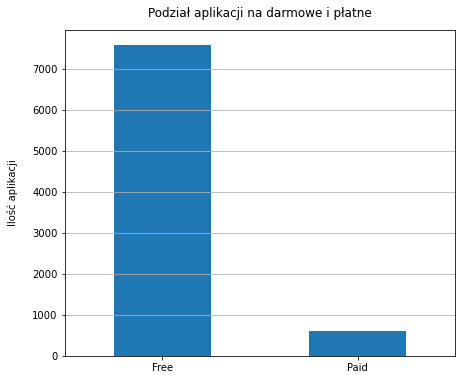

In [157]:
#podział darmowe i płatne
print(data_all["Type"].value_counts())
data_all["Type"].value_counts().plot(kind='bar',figsize=(7, 6), rot=0 )
plt.ylabel("Ilość aplikacji", labelpad=14)
plt.title("Podział aplikacji na darmowe i płatne", y=1.02)
plt.grid(b=True, axis='y')

posiadamy dane o rozmiarze :  7025
Varies with device :  1171


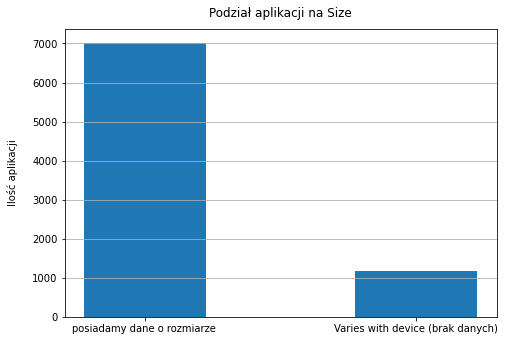

In [327]:
#podział na rozmiar aplikacji
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
z=data_all[data_all["Size"]!="Varies with device"].count()["Size"]
h=data_all[data_all["Size"]=="Varies with device"].count()["Size"]
zh=[z,h]
zh_name=["posiadamy dane o rozmiarze ","Varies with device (brak danych)"]
print("posiadamy dane o rozmiarze : ", z)
print("Varies with device : ",h)
ax.bar(zh_name,zh,width = 0.45)
plt.ylabel("Ilość aplikacji", labelpad=14)
plt.title("Podział aplikacji na Size", y=1.02)
plt.grid(b=True, axis='y')
plt.show()

Średnia liczba Size aplikacji
pow sr:  2555
poniżej sr :  4470


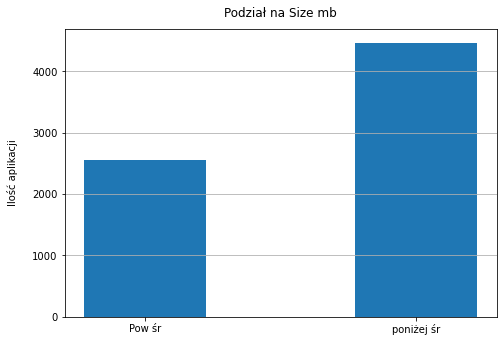

In [331]:
#wylicznie sredniej Size app ilosc pow i poniżej sr
sr=size["Size mb"].mean()
print("Średnia liczba Size aplikacji")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
z=size[size["Size mb"]>sr].count()["Size mb"]
h=size[size["Size mb"]<sr].count()["Installs"]
zh=[z,h]
zh_name=["Pow śr","poniżej śr"]
print("pow sr: ", z)
print("poniżej sr : ",h)
ax.bar(zh_name,zh,width = 0.45)
plt.ylabel("Ilość aplikacji", labelpad=14)
plt.title("Podział na Size mb", y=1.02)
plt.grid(b=True, axis='y')
plt.show()

Everyone           6618
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64


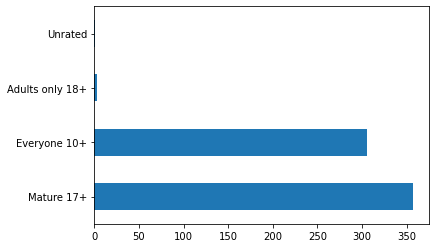

In [318]:
data_all["Content Rating"].value_counts()[2:].plot(kind='barh')
print(data_all["Content Rating"].value_counts())

Everyone           6618
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64


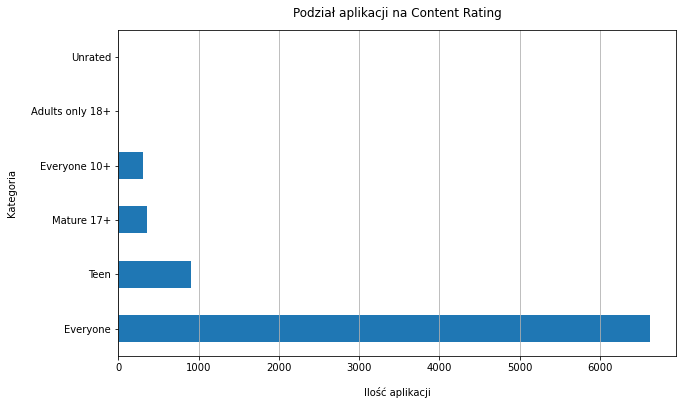

In [184]:
#ilość aplikacji podział na ceontent
print(data_all["Content Rating"].value_counts())
data_all["Content Rating"].value_counts().plot(kind='barh',figsize=(10, 6), rot=0 )
plt.ylabel("Kategoria", labelpad=14)
plt.xlabel("Ilość aplikacji", labelpad=14)
plt.title("Podział aplikacji na Content Rating", y=1.02)
plt.grid(b=True, axis='x')
plt.show()

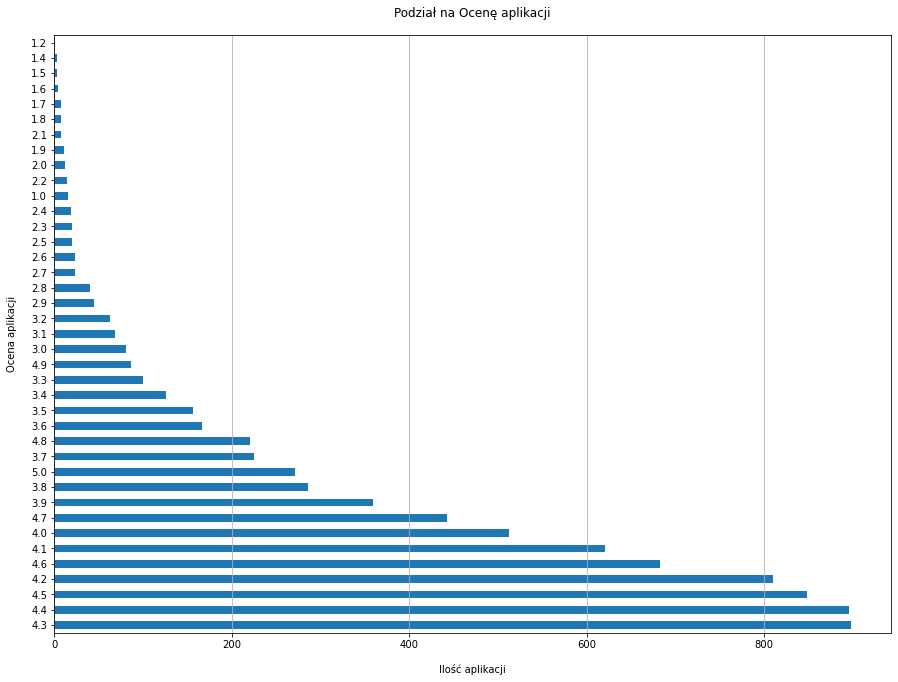

In [189]:
#podział ze wzgledu na ocene aplikacji
data_all["Rating"].value_counts().plot(kind='barh',figsize=(15, 11), rot=0 )
plt.ylabel("Ocena aplikacji", labelpad=14)
plt.xlabel("Ilość aplikacji", labelpad=14)
plt.title("Podział na Ocenę aplikacji", y=1.02)
plt.grid(b=True, axis='x')

Ocena wieksza równa 4 :  6287
Oena poniżej 4 :  1909


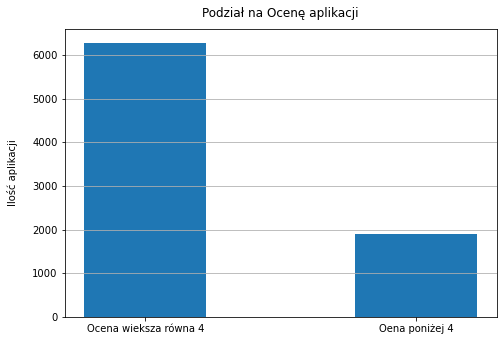

In [193]:
#ocena wieksza od 4
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
z=data_all[data_all["Rating"]>=4].count()["Rating"]
h=data_all[data_all["Rating"]<4].count()["Rating"]
zh=[z,h]
zh_name=["Ocena wieksza równa 4","Oena poniżej 4"]
print("Ocena wieksza równa 4 : ", z)
print("Oena poniżej 4 : ",h)
ax.bar(zh_name,zh,width = 0.45)
plt.ylabel("Ilość aplikacji", labelpad=14)
plt.title("Podział na Ocenę aplikacji", y=1.02)
plt.grid(b=True, axis='y')
plt.show()

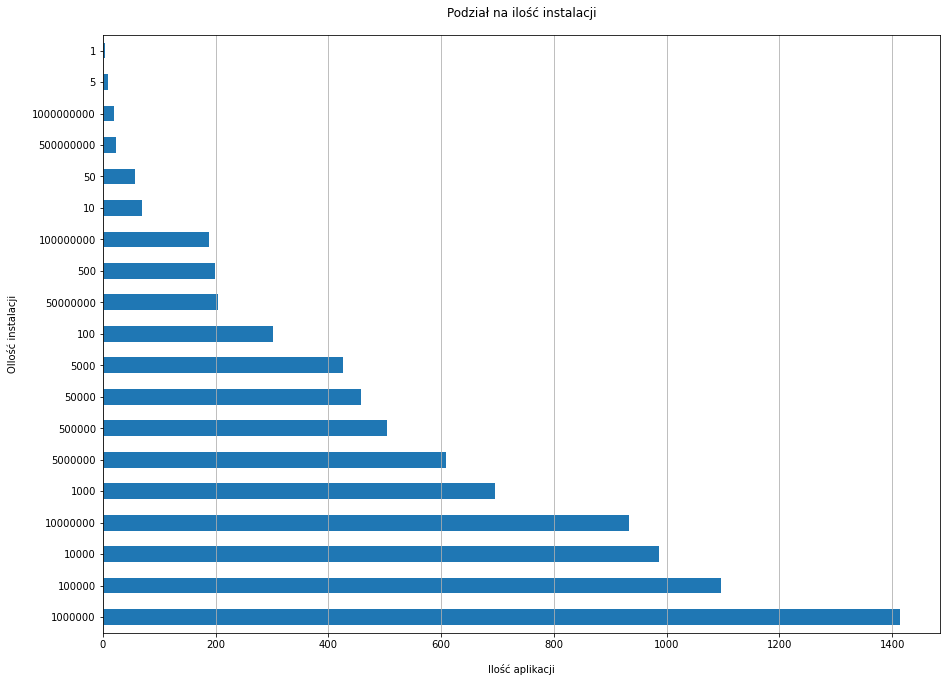

In [191]:
#podział ze wzgledu na ilość instalacji
data_all["Installs"].value_counts().plot(kind='barh',figsize=(15, 11), rot=0 )
plt.ylabel("OIlość instalacji", labelpad=14)
plt.xlabel("Ilość aplikacji", labelpad=14)
plt.title("Podział na ilość instalacji", y=1.02)
plt.grid(b=True, axis='x')

Średnia liczba instalacji wszytskich aplikacji
pow sr:  1371
poniżej sr :  6825


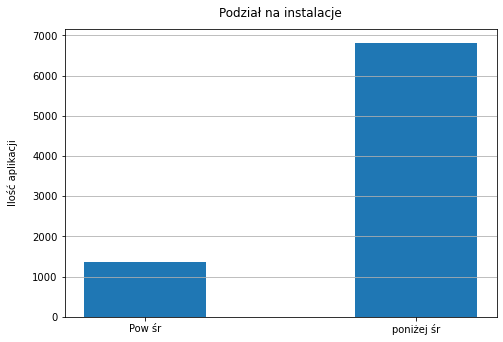

In [271]:
#podział na instalacje pow sredniej
sr=data_all["Installs"].mean()
print("Średnia liczba instalacji wszytskich aplikacji")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
z=data_all[data_all["Installs"]>sr].count()["Installs"]
h=data_all[data_all["Installs"]<sr].count()["Installs"]
zh=[z,h]
zh_name=["Pow śr","poniżej śr"]
print("pow sr: ", z)
print("poniżej sr : ",h)
ax.bar(zh_name,zh,width = 0.45)
plt.ylabel("Ilość aplikacji", labelpad=14)
plt.title("Podział na instalacje", y=1.02)
plt.grid(b=True, axis='y')
plt.show()


In [ ]:
#podział ze wzgledu na ilość instalacji
data_all["Reviews"].value_counts().plot(kind='barh',figsize=(15, 11), rot=0 )
plt.ylabel("OIlość instalacji", labelpad=14)
plt.xlabel("Ilość aplikacji", labelpad=14)
plt.title("Podział na ilość instalacji", y=1.02)
plt.grid(b=True, axis='x')

In [204]:
print(data_all["Reviews"].value_counts())
print(round(data_all["Reviews"].mean(),2))

2         82
3         76
4         74
5         74
1         67
          ..
652940     1
190086     1
3715       1
525552     1
8188       1
Name: Reviews, Length: 5321, dtype: int64
255248.35


Sr 255248.35
pow sr:  888
poniżej sr :  7308


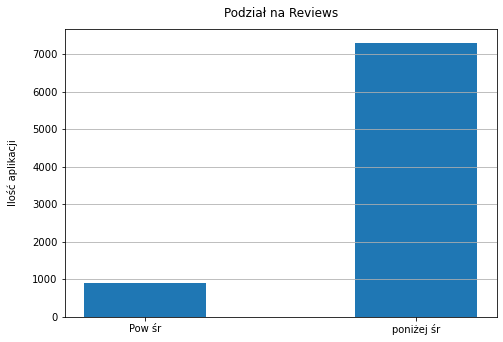

In [205]:
#podział na reviews pow i poniżej sredniej
sr=round(data_all["Reviews"].mean(),2)
print("Sr", sr)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
z=data_all[data_all["Reviews"]>sr].count()["Reviews"]
h=data_all[data_all["Reviews"]<sr].count()["Reviews"]
zh=[z,h]
zh_name=["Pow śr","poniżej śr"]
print("pow sr: ", z)
print("poniżej sr : ",h)
ax.bar(zh_name,zh,width = 0.45)
plt.ylabel("Ilość aplikacji", labelpad=14)
plt.title("Podział na Reviews", y=1.02)
plt.grid(b=True, axis='y')
plt.show()

Dane przed filtrwaniem :  10841  po fitltowaniu :  8196


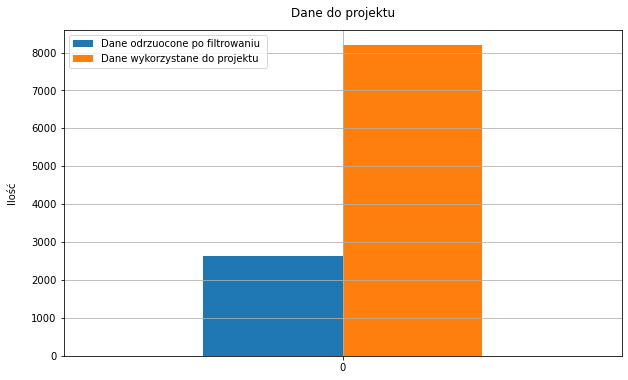

In [320]:

x=df.count()["App"]
y=data_all.count()["App"]
print("Dane przed filtrwaniem : ", x," po fitltowaniu : ",y)
z=x-y

df5 = pd.DataFrame({'Dane odrzuocone po filtrowaniu ':[z], 'Dane wykorzystane do projektu':[y]})
df5.plot.bar(rot=0,figsize=(10, 6))
plt.ylabel("Ilość", labelpad=14)
plt.title("Dane do projektu", y=1.02)
plt.grid(True)



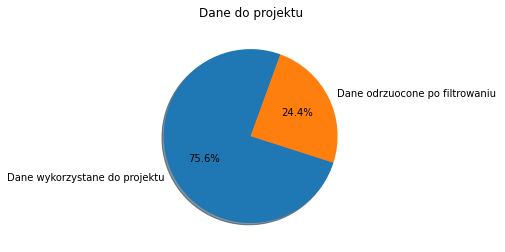

In [321]:

 
m=[y,z]
name=['Dane wykorzystane do projektu','Dane odrzuocone po filtrowaniu ']
plt.pie( m ,labels=name , startangle=70, shadow=True,autopct='%1.1f%%')
plt.title("Dane do projektu", y=1.02)
plt.show()